1. Descripción del Conjunto de Datos:


Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

Fuente: https://www.kaggle.com/datasets/yasserh/titanic-dataset


Tamaño: 61,19 kB

Acerca de este archivo


El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado por muchos como un buque “insumergible”, se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos los que estaban a bordo, lo que provocó la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que construya un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, género, clase socioeconómica, etc.).

2. Análisis Exploratorio de Datos (EDA) Inicial:


Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.


Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.


Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [ ]:
import pandas as pd
import numpy as np


url = 'https://drive.google.com/uc?id=1IiRj--6E2GLBVqTKN7TgxCalyYwILdRn&export=download'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Manejo de datos faltantes

In [ ]:
df['Age']= df['Age'].fillna(df['Age'].mean()) # Manejo de vlaores faltantes con la media de edad del DataFrame en la columna Age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Reemplazo de nulos en Cabin con la moda
# Calcular la moda de la columna
moda = df['Cabin'].mode()[0]
# Rellenar los valores nulos con la moda
df['Cabin'].fillna(moda, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Reemplazo de nulos en Embarked con la moda
# Calcular la moda de columna
moda1 = df['Embarked'].mode()[0]
# Rellenar los valores nulos con la moda
df['Embarked'].fillna(moda1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Visualización de los tipos de datos y verificación de presencia valores categóricos diferentes o ingresados de alguna forma diferente

In [ ]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna PassengerId:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

Visualización del comportamiento de datos

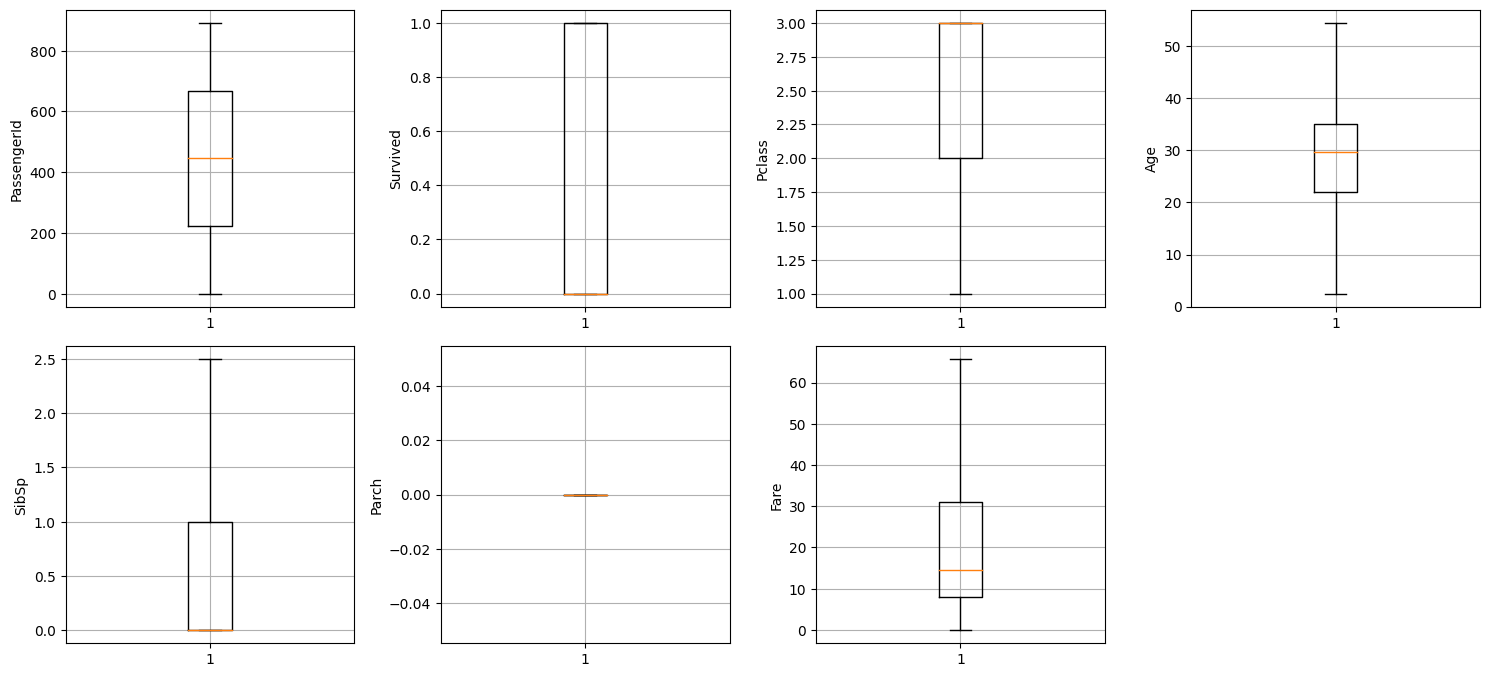

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

In [ ]:
columnas = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for columna in columnas:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  filtroOutlierAbajo = df[columna] < (Q1 - 1.5 * IQR)
  filtroOutlierArriba = df[columna] > (Q3 + 1.5 * IQR)
  print(f"\nLímite inferior: {Q1 - 1.5 * IQR}")
  print(f"Límite Superior: {Q3 + 1.5 * IQR}")
  indicesALimpiarAbajo = df.loc[filtroOutlierAbajo].index
  indicesALimpiarArriba = df.loc[filtroOutlierArriba].index
  df.loc[indicesALimpiarAbajo, columna] = Q1 - 1.5 * IQR
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR

df.describe().round(3)


Límite inferior: -444.0
Límite Superior: 1336.0

Límite inferior: -1.5
Límite Superior: 2.5

Límite inferior: 0.5
Límite Superior: 4.5

Límite inferior: 2.5
Límite Superior: 54.5

Límite inferior: -1.5
Límite Superior: 2.5

Límite inferior: 0.0
Límite Superior: 0.0

Límite inferior: -26.724
Límite Superior: 65.6344


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,891.000,891.000,891.0,891.000
mean,446.000,0.384,2.309,29.377,0.426,0.0,24.047
std,257.354,0.487,0.836,12.062,0.708,0.0,20.482
min,1.000,0.000,1.000,2.500,0.000,0.0,0.000
25%,223.500,0.000,2.000,22.000,0.000,0.0,7.910
50%,446.000,0.000,3.000,29.699,0.000,0.0,14.454
75%,668.500,1.000,3.000,35.000,1.000,0.0,31.000
max,891.000,1.000,3.000,54.500,2.500,0.0,65.634


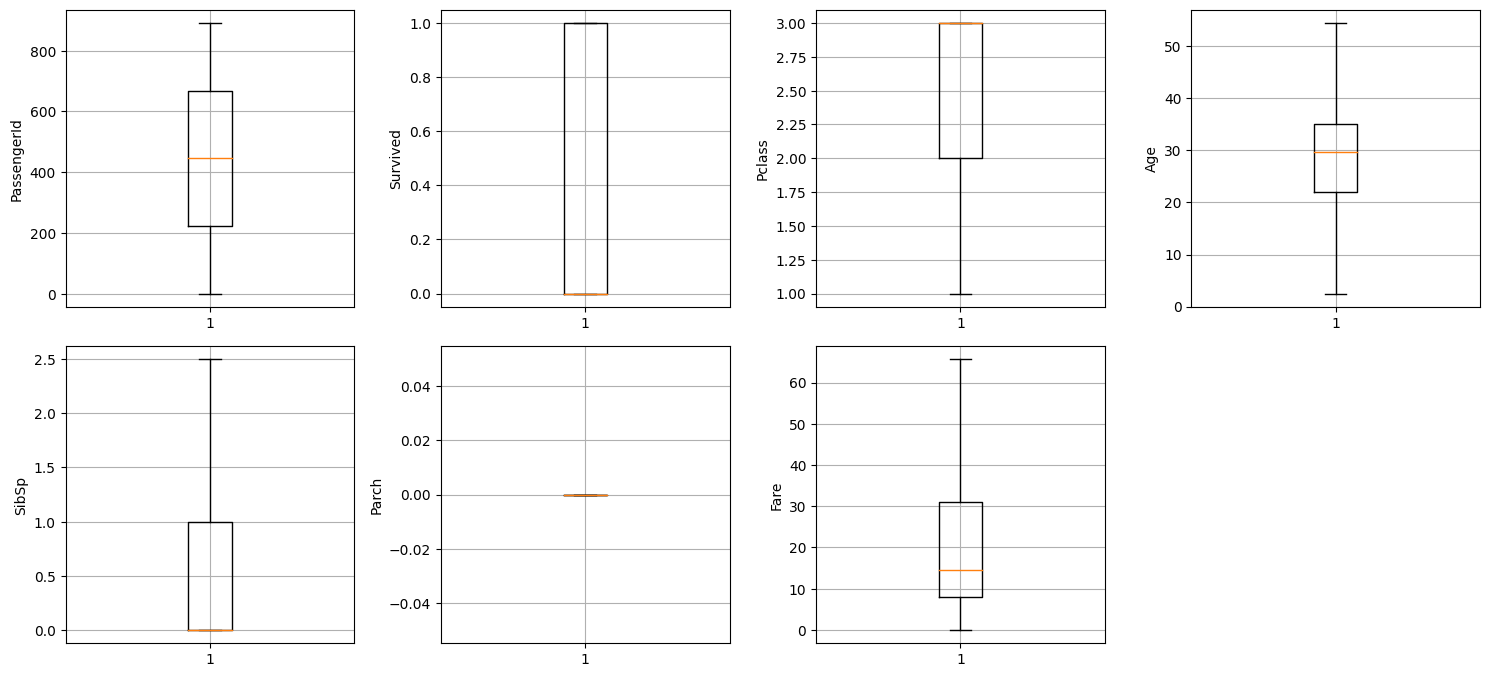

In [ ]:
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

Visualización comportamiento de los datos

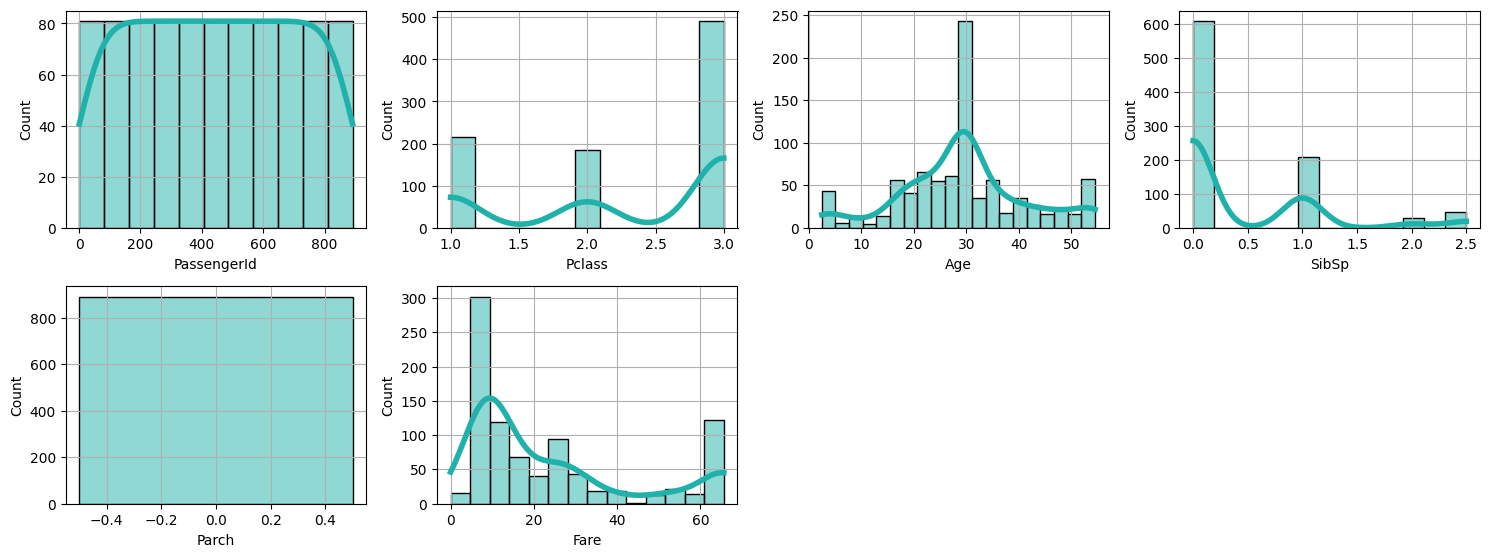

In [ ]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Survived')

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'lightseagreen', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

Se puede evidenciar el comportamiento de los datos es simétrico  en 'Parch'.


Comportamiento normal en la categoría 'Pclass' ya que se refiere a las clases dentro de la embarcación.

En 'Age' hay un comportamiento en forma de campana donde predomina el número 30.

Para 'SibSp' comportamiento bimodal.

'Fare' comportamiento sesgado hacia la izquierda lo que es coherente para el precio del tiquete.


3. Diagnóstico y Selección de Problema:
Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.


Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).


Justificar la elección del problema y explicar por qué es relevante y desafiante.

1. Regresión Logística.

Es efectivo para problemas de clasificación binaria porque genera una interpretación clara de las probabilidades de pertenecer a cada clase y es fácil de implementar.


2. Árboles de Decisión y Random Forest.

los árboles de decisión permiten capturar las interacciones no lineales entre las categorías.

Random Forest es un ensamblaje de árboles de decisión lo que puede contribuir a mejorar la precisión y reducir el sobreajuste.

3. KNN.

Este modelo está basado en la distancia que puede ser útil para situaciones con un número reducido de categorías y donde las relaciones entre diversos puntos de datos pueden ser relevantes.


Se adaptan de mejor modo los modelos de clasificación de tipo binario, como árboles de decisión, Random Forest y KNN; al escoger un modelo debe ser basado en la complejidad de los datos, rendimiento esperado y la interpretabilidad objetivo.